In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="6" color="red">06_피마인디언발병예측(회귀분석/분류분석)</font></b>

In [1]:
import pandas as pd
import numpy as np
import sys # 최대 정수
from tensorflow.keras import utils # utils.to_categorical() : 분류분석시 y데이터 원핫인코딩
from tensorflow.keras.models import Sequential # 모델 생성
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt

# 1. 로지스틱 회귀분석(이진분류)
 - 1. 데이터 셋 생성 & 전처리

In [2]:
# 1. csv파일을 데이터프레임을 읽어오기(결측치처리, 균형확인 용이) 기본encoding=utf-8
df = pd.read_csv('data/pima-indians-diabetes.csv', comment='#', header=None)
df.head()
# 0. 임신횟수
# 1. 2시간내 포도당 농도
# 2. 혈압
# 3. 피부접힘 두께
# 4. 인슐린수치
# 5. BMI체질량지수
# 6. 가족력
# 7. 나이

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.info() # 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isna().sum() # 열별 결측치 갯수

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [6]:
# 타겟변수의 균형
df[8].value_counts()/len(df)

0    0.651042
1    0.348958
Name: 8, dtype: float64

In [7]:
df.values
df.to_numpy()

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [8]:
# 2. csv파일을 numpy 배열로 읽어오기 : np.loadtxt() #이 있는 행은 제외하고 읽어오기
        #기본 encoding=cp949
dataset = np.loadtxt('data/pima-indians-diabetes.csv',delimiter=',', encoding='utf-8')
dataset.shape

(768, 9)

In [9]:
# 데이터 분할 : 학습데이터셋(모델학습용) + 시험데이터셋(모델평가용)
X_train = dataset[:620, :-1]
y_train = dataset[:620, -1]
X_test = dataset[620:, :-1]
y_test = dataset[620:, -1]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((620, 8), (620,), (148, 8), (148,))

# 2. 모델 구성

In [10]:
model = Sequential()
#model.add(Dense(units=32, input_dim=8, 
#               activation='relu'))
model.add(Input(shape=(8,)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='elu'))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 필요메모리 : 833 * 4byte + etc

# 3. 학습과정 설정

In [11]:
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy']) # 정석
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 학습

In [12]:
%%time
hist = model.fit(X_train, y_train, epochs=200, batch_size=310, 
                 #validation_data=(X_test, y_test), #검증데이터셋이 있을 경우
                 validation_split=0.1, #검증데이터 비율()
                 verbose=1)

Epoch 1/200
2/2 [==============================] - 0s 146ms/step - loss: 4.8834 - accuracy: 0.3530 - val_loss: 2.4118 - val_accuracy: 0.5161
Epoch 2/200
2/2 [==============================] - 0s 16ms/step - loss: 2.4184 - accuracy: 0.4749 - val_loss: 2.0532 - val_accuracy: 0.5806
Epoch 3/200
2/2 [==============================] - 0s 33ms/step - loss: 2.3620 - accuracy: 0.5896 - val_loss: 2.8695 - val_accuracy: 0.6613
Epoch 4/200
2/2 [==============================] - 0s 36ms/step - loss: 2.8076 - accuracy: 0.6237 - val_loss: 2.8907 - val_accuracy: 0.6613
Epoch 5/200
2/2 [==============================] - 0s 17ms/step - loss: 2.7036 - accuracy: 0.6272 - val_loss: 2.3662 - val_accuracy: 0.6613
Epoch 6/200
2/2 [==============================] - 0s 21ms/step - loss: 2.2163 - accuracy: 0.6039 - val_loss: 1.7168 - val_accuracy: 0.5806
Epoch 7/200
2/2 [==============================] - 0s 10ms/step - loss: 1.8302 - accuracy: 0.5663 - val_loss: 1.5439 - val_accuracy: 0.5645
Epoch 8/200
2/2 [==

2/2 [==============================] - 0s 14ms/step - loss: 0.6266 - accuracy: 0.7097 - val_loss: 0.6302 - val_accuracy: 0.6452
Epoch 60/200
2/2 [==============================] - 0s 20ms/step - loss: 0.6238 - accuracy: 0.7043 - val_loss: 0.6276 - val_accuracy: 0.6452
Epoch 61/200
2/2 [==============================] - 0s 16ms/step - loss: 0.6217 - accuracy: 0.7079 - val_loss: 0.6260 - val_accuracy: 0.6452
Epoch 62/200
2/2 [==============================] - 0s 15ms/step - loss: 0.6158 - accuracy: 0.7097 - val_loss: 0.6321 - val_accuracy: 0.6613
Epoch 63/200
2/2 [==============================] - 0s 32ms/step - loss: 0.6160 - accuracy: 0.6953 - val_loss: 0.6226 - val_accuracy: 0.6774
Epoch 64/200
2/2 [==============================] - 0s 23ms/step - loss: 0.6097 - accuracy: 0.7097 - val_loss: 0.6167 - val_accuracy: 0.6774
Epoch 65/200
2/2 [==============================] - 0s 31ms/step - loss: 0.6098 - accuracy: 0.7043 - val_loss: 0.6181 - val_accuracy: 0.6452
Epoch 66/200
2/2 [========

2/2 [==============================] - 0s 29ms/step - loss: 0.4929 - accuracy: 0.7616 - val_loss: 0.5668 - val_accuracy: 0.7258
Epoch 118/200
2/2 [==============================] - 0s 17ms/step - loss: 0.4917 - accuracy: 0.7616 - val_loss: 0.5694 - val_accuracy: 0.7097
Epoch 119/200
2/2 [==============================] - 0s 19ms/step - loss: 0.4893 - accuracy: 0.7778 - val_loss: 0.5683 - val_accuracy: 0.7258
Epoch 120/200
2/2 [==============================] - 0s 30ms/step - loss: 0.4879 - accuracy: 0.7814 - val_loss: 0.5665 - val_accuracy: 0.7258
Epoch 121/200
2/2 [==============================] - 0s 19ms/step - loss: 0.4878 - accuracy: 0.7796 - val_loss: 0.5642 - val_accuracy: 0.7258
Epoch 122/200
2/2 [==============================] - 0s 22ms/step - loss: 0.4852 - accuracy: 0.7796 - val_loss: 0.5614 - val_accuracy: 0.7258
Epoch 123/200
2/2 [==============================] - 0s 24ms/step - loss: 0.4853 - accuracy: 0.7832 - val_loss: 0.5600 - val_accuracy: 0.7258
Epoch 124/200
2/2 [=

Epoch 175/200
2/2 [==============================] - 0s 18ms/step - loss: 0.4496 - accuracy: 0.8047 - val_loss: 0.5450 - val_accuracy: 0.7581
Epoch 176/200
2/2 [==============================] - 0s 20ms/step - loss: 0.4496 - accuracy: 0.8065 - val_loss: 0.5454 - val_accuracy: 0.7419
Epoch 177/200
2/2 [==============================] - 0s 24ms/step - loss: 0.4490 - accuracy: 0.8136 - val_loss: 0.5498 - val_accuracy: 0.7097
Epoch 178/200
2/2 [==============================] - 0s 16ms/step - loss: 0.4483 - accuracy: 0.8082 - val_loss: 0.5512 - val_accuracy: 0.7419
Epoch 179/200
2/2 [==============================] - 0s 18ms/step - loss: 0.4477 - accuracy: 0.8100 - val_loss: 0.5511 - val_accuracy: 0.7581
Epoch 180/200
2/2 [==============================] - 0s 18ms/step - loss: 0.4481 - accuracy: 0.8047 - val_loss: 0.5496 - val_accuracy: 0.7419
Epoch 181/200
2/2 [==============================] - 0s 36ms/step - loss: 0.4484 - accuracy: 0.8029 - val_loss: 0.5505 - val_accuracy: 0.7419
Epoch 

In [13]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# 5. 모델 평가하기
 - 학습과정 시각화하여 살펴보기
 - 평가
 - 교차표(혼동매트릭스, 성능평가지표) 그리기

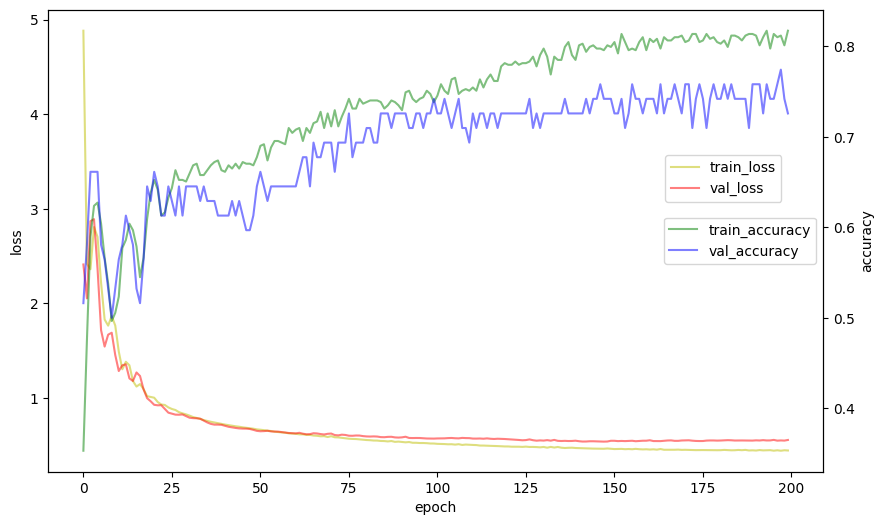

In [16]:
# 학습과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss', alpha=0.5)
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss', alpha=0.5)
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuracy', alpha=0.5)
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuracy', alpha=0.5)
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(bbox_to_anchor=(0.955, 0.7))
acc_ax.legend(loc='center right')
#loss_ax.legend(loc='lower right')
#acc_ax.legend(loc='upper right')
plt.show()

In [29]:
# 모델 평가(X)
model.evaluate(X_train, y_train)

20/20 [==============================] - 0s 1ms/step - loss: 0.4578 - accuracy: 0.7984


[0.4577901065349579, 0.7983871102333069]

In [17]:
#모델 평가(0)
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.6016 - accuracy: 0.6689


[0.6015805006027222, 0.6689189076423645]

In [18]:
score = model.evaluate(X_test, y_test)
print("loss : {}, 정확도 : : {:.2f}%".format(score[0], score[1]*100))

5/5 [==============================] - 0s 2ms/step - loss: 0.6016 - accuracy: 0.6689
loss : 0.6015805006027222, 정확도 : : 66.89%


In [23]:
# 교차표(혼동매트릭스, 성능평가지표) 그리기 : 테스트셋의 실제값과 예측값
y_hat = (model.predict(X_test) > 0.5).astype(int) #예측값 2차원 배열
y_test.shape, y_hat.shape #실제값은 1차원 

5/5 [==============================] - 0s 1ms/step


((148,), (148, 1))

In [27]:
y_hat.reshape(-1) #2차원을 1차원으로

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0])

In [25]:
#confusion matrix
TN, FP, FN, TP = 0, 0, 0, 0

In [26]:
print(TN, FP, FN, TP)

0 0 0 0


In [28]:
for y, h in zip(y_test, y_hat.reshape(-1)):
    if y==0 and h==0:
        TN += 1
    elif y==0 and h==1:
        FP += 1
    elif y==1 and h==0:
        FN += 1
    else:
        TP += 1
print(TN, FP)
print(FN, TP)

71 25
24 28


In [32]:
ctab = pd.crosstab(y_test, y_hat.reshape(-1)) # y_hat 에러남
ctab.index.name = '실제값'
ctab.columns.name = '예측값'
ctab

예측값,0,1
실제값,,
0.0,71,25
1.0,24,28


In [33]:
pd.crosstab(y_test, y_hat.reshape(-1), rownames=['실제값'], colnames=['예측값']) # 결과가 Dataframe

예측값,0,1
실제값,,
0.0,71,25
1.0,24,28


In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_hat) # y_hat.reshape(-1) 둘다 가능
# 결과가 numpy배열

array([[71, 25],
       [24, 28]], dtype=int64)

# 6. 모델 사용

In [35]:
X_test[0]

array([  2.   , 112.   ,  86.   ,  42.   , 160.   ,  38.4  ,   0.246,
        28.   ])

In [37]:
(model.predict([[2.   , 112.   ,  86.   ,  42.   , 160.   ,  38.4  ,   0.246,
        28]]) > 0.5).astype(int)

1/1 [==============================] - 0s 35ms/step


array([[0]])

In [38]:
#model.save('model/06_binary.h5')

In [39]:
from tensorflow.keras.models import save_model, load_model
save_model(model, 'model/06_binary.h5')
model2 = load_model('model/06_binary.h5')

In [41]:
(model2.predict([[2.   , 112.   ,  86.   ,  42.   , 160.   ,  38.4  ,   0.246,
        28]]) > 0.5).astype(int)

1/1 [==============================] - 0s 50ms/step


array([[0]])

# 분류분석
 - 1. 데이터 생성 및 전처리 : 훈련셋600, 검증셋100, 테스트셋 68으로 분리, 타겟변수의 원핫인코딩
 - 2. 모델생성(input 8, output 2) : 출력층의 활성화함수 : 'softmax'
 - 3. 모델학습과정 loss='categorical_crossentropy' metrics=['accuracy']
 - 4. 모델 학습 validation_data = [X_val, Y_val]
 - 5. 모델 학습 평가
 - 6. 모델 사용 - 예측시 argmax()함수 활용 0 1 0.99 0.01

## 1. 데이터셋 생성및 전처리

In [42]:
df = pd.read_csv('data/pima-indians-diabetes.csv', comment='#', header=None)
dataset = df.values
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [43]:
# 훈련셋600, 검증셋100, 테스트셋68
X_train = dataset[:600, :-1]
y_train = dataset[:600, -1]
X_val   = dataset[600:700, :-1]
y_val   = dataset[600:700, -1]
X_test  = dataset[700:, :-1]
y_test  = dataset[700:, -1]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((600, 8), (600,), (100, 8), (100,), (68, 8), (68,))

In [44]:
# 분류분석을 위한 타겟(종속)변수의 원핫인코딩
Y_train = utils.to_categorical(y_train)
Y_val   = utils.to_categorical(y_val, 2)
Y_test  = utils.to_categorical(y_test)
Y_train.shape, Y_val.shape, Y_test.shape

((600, 2), (100, 2), (68, 2))

In [45]:
print('원 데이터 :', y_train[:3])
print('원핫인코딩 데이터 :\n', Y_train[:3])

원 데이터 : [1. 0. 1.]
원핫인코딩 데이터 :
 [[0. 1.]
 [1. 0.]
 [0. 1.]]


## 2. 모델생성(input8, target2)

In [57]:
model = Sequential()
model.add(Dense(units=32, input_shape=(8,), activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=2, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 32)                288       
                                                                 
 dense_12 (Dense)            (None, 64)                2112      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dense_15 (Dense)            (None, 2)                 34        
                                                                 
Total params: 5,042
Trainable params: 5,042
Non-trainable params: 0
_________________________________________________________________


## 3. 학습과정 설정

In [58]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

## 4. 모델 학습

In [59]:
hist = model.fit(X_train, Y_train, epochs=200, validation_data=(X_val, Y_val),
                verbose=1)

Epoch 1/200
19/19 [==============================] - 1s 8ms/step - loss: 3.6531 - accuracy: 0.6550 - val_loss: 0.6695 - val_accuracy: 0.6400
Epoch 2/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6472 - accuracy: 0.6583 - val_loss: 0.6317 - val_accuracy: 0.7000
Epoch 3/200
19/19 [==============================] - 0s 3ms/step - loss: 0.6234 - accuracy: 0.6783 - val_loss: 0.6231 - val_accuracy: 0.6700
Epoch 4/200
19/19 [==============================] - 0s 3ms/step - loss: 0.6326 - accuracy: 0.6533 - val_loss: 0.6270 - val_accuracy: 0.6600
Epoch 5/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6077 - accuracy: 0.6783 - val_loss: 0.6239 - val_accuracy: 0.6200
Epoch 6/200
19/19 [==============================] - 0s 2ms/step - loss: 0.5989 - accuracy: 0.6917 - val_loss: 0.6628 - val_accuracy: 0.6100
Epoch 7/200
19/19 [==============================] - 0s 3ms/step - loss: 0.6136 - accuracy: 0.6467 - val_loss: 0.6193 - val_accuracy: 0.6500
Epoch 8/200
1

Epoch 59/200
19/19 [==============================] - 0s 2ms/step - loss: 0.5341 - accuracy: 0.7317 - val_loss: 0.5670 - val_accuracy: 0.6900
Epoch 60/200
19/19 [==============================] - 0s 2ms/step - loss: 0.5304 - accuracy: 0.7267 - val_loss: 0.5764 - val_accuracy: 0.6900
Epoch 61/200
19/19 [==============================] - 0s 2ms/step - loss: 0.5216 - accuracy: 0.7317 - val_loss: 0.5719 - val_accuracy: 0.7100
Epoch 62/200
19/19 [==============================] - 0s 2ms/step - loss: 0.5230 - accuracy: 0.7433 - val_loss: 0.6045 - val_accuracy: 0.6700
Epoch 63/200
19/19 [==============================] - 0s 3ms/step - loss: 0.5297 - accuracy: 0.7167 - val_loss: 0.6345 - val_accuracy: 0.6600
Epoch 64/200
19/19 [==============================] - 0s 2ms/step - loss: 0.5207 - accuracy: 0.7350 - val_loss: 0.5557 - val_accuracy: 0.7600
Epoch 65/200
19/19 [==============================] - 0s 3ms/step - loss: 0.5131 - accuracy: 0.7417 - val_loss: 0.6252 - val_accuracy: 0.7100
Epoch 

19/19 [==============================] - 0s 3ms/step - loss: 0.4756 - accuracy: 0.7683 - val_loss: 0.5979 - val_accuracy: 0.7200
Epoch 117/200
19/19 [==============================] - 0s 3ms/step - loss: 0.4588 - accuracy: 0.7800 - val_loss: 0.6028 - val_accuracy: 0.6800
Epoch 118/200
19/19 [==============================] - 0s 3ms/step - loss: 0.4579 - accuracy: 0.7767 - val_loss: 0.5978 - val_accuracy: 0.6800
Epoch 119/200
19/19 [==============================] - 0s 2ms/step - loss: 0.4749 - accuracy: 0.7683 - val_loss: 0.6276 - val_accuracy: 0.6800
Epoch 120/200
19/19 [==============================] - 0s 2ms/step - loss: 0.4537 - accuracy: 0.7767 - val_loss: 0.6348 - val_accuracy: 0.6700
Epoch 121/200
19/19 [==============================] - 0s 3ms/step - loss: 0.4464 - accuracy: 0.7867 - val_loss: 0.6338 - val_accuracy: 0.6400
Epoch 122/200
19/19 [==============================] - 0s 3ms/step - loss: 0.4464 - accuracy: 0.7817 - val_loss: 0.5960 - val_accuracy: 0.6800
Epoch 123/200

19/19 [==============================] - 0s 2ms/step - loss: 0.3806 - accuracy: 0.8283 - val_loss: 0.7344 - val_accuracy: 0.6900
Epoch 174/200
19/19 [==============================] - 0s 3ms/step - loss: 0.3714 - accuracy: 0.8217 - val_loss: 0.6970 - val_accuracy: 0.6800
Epoch 175/200
19/19 [==============================] - 0s 3ms/step - loss: 0.3884 - accuracy: 0.7933 - val_loss: 0.7468 - val_accuracy: 0.6700
Epoch 176/200
19/19 [==============================] - 0s 2ms/step - loss: 0.3789 - accuracy: 0.8267 - val_loss: 0.7918 - val_accuracy: 0.7100
Epoch 177/200
19/19 [==============================] - 0s 3ms/step - loss: 0.3665 - accuracy: 0.8233 - val_loss: 0.8876 - val_accuracy: 0.6800
Epoch 178/200
19/19 [==============================] - 0s 3ms/step - loss: 0.3740 - accuracy: 0.8117 - val_loss: 0.7470 - val_accuracy: 0.6800
Epoch 179/200
19/19 [==============================] - 0s 3ms/step - loss: 0.3698 - accuracy: 0.8167 - val_loss: 0.7785 - val_accuracy: 0.7400
Epoch 180/200

## 5. 모델 평가

In [60]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

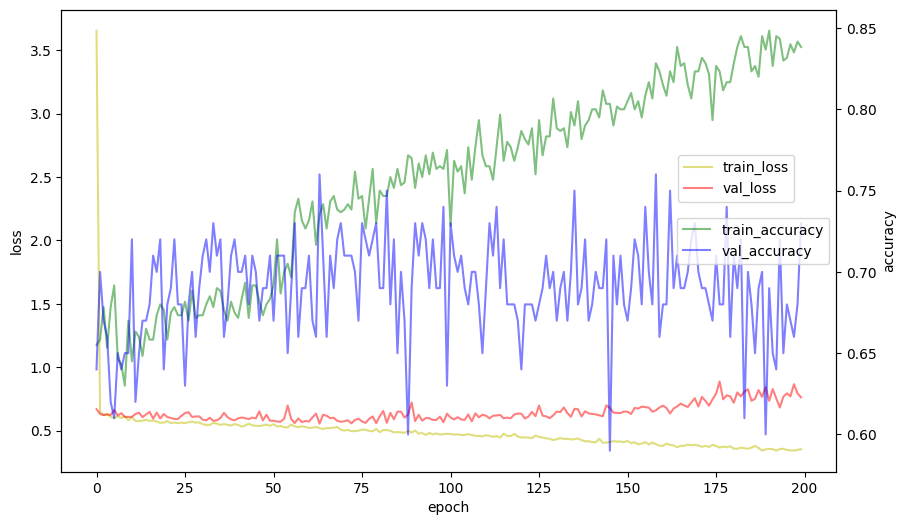

In [61]:
# 학습과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss', alpha=0.5)
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss', alpha=0.5)
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuracy', alpha=0.5)
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuracy', alpha=0.5)
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(bbox_to_anchor=(0.955, 0.7))
acc_ax.legend(loc='center right')
#loss_ax.legend(loc='lower right')
#acc_ax.legend(loc='upper right')
plt.show()

In [62]:
# 모델 평가
model.evaluate(X_test, Y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.9563 - accuracy: 0.7206


[0.9562786221504211, 0.720588207244873]

In [63]:
# 혼동행렬, 교차표 (원핫인코딩을 다시 복구)
# y_test 실제값
y_hat = model.predict(X_test).argmax(axis=1)

3/3 [==============================] - 0s 0s/step


In [64]:
pd.crosstab(y_test, y_hat, rownames=['실제값'], colnames=['예측값'])

예측값,0,1
실제값,,
0.0,35,6
1.0,13,14


In [65]:
confusion_matrix(y_test, y_hat)

array([[35,  6],
       [13, 14]], dtype=int64)

## 6. 모델 사용하기

In [66]:
X_test[0]

array([  2.   , 122.   ,  76.   ,  27.   , 200.   ,  35.9  ,   0.483,
        26.   ])

In [69]:
pred = model.predict(X_test[0].reshape(-1, 8))
pred.argmax(axis=1)

1/1 [==============================] - 0s 21ms/step


array([0], dtype=int64)